<a href="https://colab.research.google.com/github/abhijeet-gode/Semi---Automations/blob/Data-Science%2C-Data-Analysis/PDF_to_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PDF Text Extraction

#### Introduction:
   This project focuses on the extraction of raw text from a PDF document, employing a variety of open-source libraries to assess the effectiveness of different approaches. The libraries used include OpenCV, PymuPDF, PyPDF2, PDFMiner, PDF2image, and Pytesseract. The objective is to analyze the performance of each library in extracting text from a sample PDF file, which contains a single page with textual content, logos, and a signature.

#### Libraries Used:
   - OpenCV: Image processing library for handling images within PDFs.
   - PymuPDF: A library for extracting text and images from PDFs.
   - PyPDF2: A library for reading and extracting text from PDFs.
   - PDFMiner: A library for parsing PDF documents and extracting text.
   - PDF2image: A library for converting PDF pages to images.
   - Pytesseract: An OCR (Optical Character Recognition) tool for extracting text from images.

#### Data Source:
   - A sample certificate with 1 page incuding, text, image logo and signature and title.
   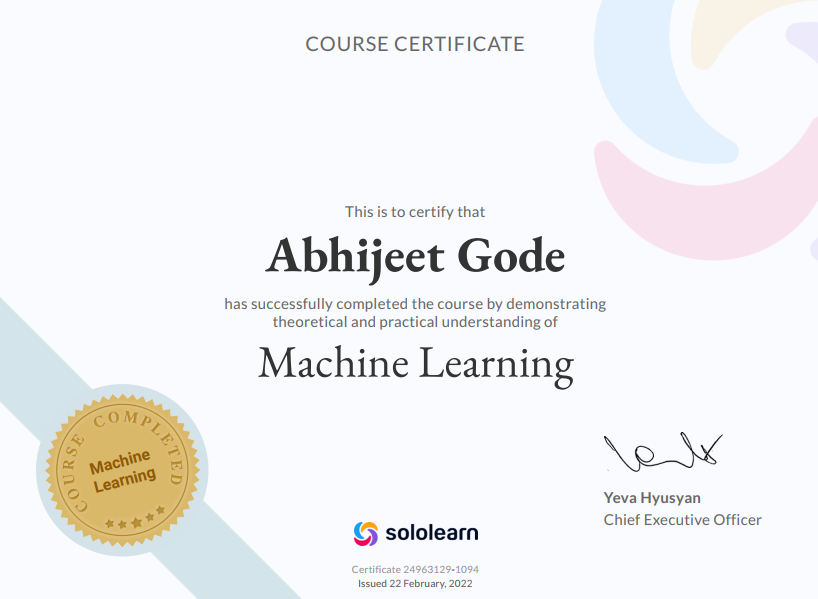

#### Bellow are code snippet with result.

In [6]:
# Given are the module we need to perform the task if the you don't have module install you can use this command to install.
# !pip install pymupdf
# !pip install PyPDF2 pdfminer.six
# !pip install pdf2image
# !apt-get install -y poppler-utils
# !pip install pytesseract
# !sudo apt install tesseract-ocr
# !pip install opencv-python

# Implementation with PymuPDF

In [2]:
import fitz # PymuPDF module

def extract_text_from_pdf(pdf_path):
  ''' This function is used to take file path of pdf file and perform and text extraction.'''
  # Module starting open file
  pdf_document = fitz.open(pdf_path)

  extracted_text = "" # Empty variable to store the text from pdf pages.

  for page_number in range(pdf_document.page_count):  # Loop over the pdf pages
    page = pdf_document[page_number] # indexing based on pages pdf file have
    page_text = page.get_text() # processing the text from each page
    extracted_text += page_text # strong to result of page to empty variable for further use
  pdf_document.close()  # closing the pdf document with Pymupdf module
  return extracted_text # Returning the result.

pdf_file = '/content/Machine Learning.pdf' # Define a variable with file path

extracted_text = extract_text_from_pdf(pdf_file) # Passing variable to the function
print(extracted_text)

COURSE CERTIFICATE
This is to certify that
Abhijeet Gode
has successfully completed the course by demonstrating
theoretical and practical understanding of
Machine Learning
Certificate 24963129-1094
Issued 22 February, 2022
Machine
Learning
Yeva Hyusyan
Chief Executive Officer



# Implementing PyPDF2 and PDFMiner

In [9]:
import PyPDF2 # Importing Module for PyPDF2
from pdfminer.high_level import extract_text # PDFMiner

def extract_text_with_pypdf2(pdf_file): # Define the function for PyPDF2
  with open(pdf_file, 'rb') as file:    # opening the file for reading in binary format and processing for Pypdf2
    pdf_reader = PyPDF2.PdfReader(file)

    extracted_text = ''   # Empty variable to store the result
    for page_number in range(len(pdf_reader.pages)):    # Reading the pdf page to start the extraction page wise
      page = pdf_reader.pages[page_number]  # Processing to read the text from page
      page_text = page.extract_text() # Extracting and storing the text to empty variable
      extracted_text += page_text
  return extracted_text # output for further use

def extract_text_with_pdfminer(pdf_file): # Define the funtion for PDFMiner
  extracted_text = extract_text(pdf_file) # Its directly start the extraction as its a high level framework to work aournd for this task
  return extracted_text

result_pypdf2 = extract_text_with_pypdf2(pdf_file)
print(f" Output for PyPDF2:\n\n {result_pypdf2}")
print('\n\n')
result_pdfminer = extract_text_with_pdfminer(pdf_file)
print(f"Output for PDFMiner:\n\n{result_pdfminer}")

 Output for PyPDF2:

 COURSE CERTIFICATE
This is to certify that
Abhijeet Gode
has successfully completed the course by demonstrating
theoretical and practical understanding of
Machine Learning
Certificate 24963129-1094
Issued 22 February, 2022
Machine
Learning
Yeva Hyusyan
Chief Executive Officer



Output for PDFMiner:

COURSE CERTIFICATE

This is to certify that

Abhijeet Gode

has successfully completed the course by demonstrating
theoretical and practical understanding of

Machine Learning

M a c h i n e
L e a r n i n g

Yeva Hyusyan
Chief Executive Officer

Certificate 24963129-1094
Issued 22 February, 2022




# Implementation of OpenCV and Pytesseract

In [4]:
import cv2  # Importing OpenCV module
import pytesseract # Pytesseract for OCR
from pdf2image import convert_from_path # Module for converting the pdf file to Image
from google.colab import files # Google module for file upload request
import numpy as np # Numpy for working with array

# Upload the PDF file
uploaded = files.upload()
pdf_file = list(uploaded.keys())[0]

def convert_pdf_to_image(pdf_path):  # Define the function for Image conversion from pdf
    images = convert_from_path(pdf_path, poppler_path='/usr/bin') # file path and Poppler path is to converting the pdf to image
    return images # PIL

def extract_text_from_image(image):
    # Convert the Python Image Library image to a NumPy array
    image_np = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    # Convert to grayscale
    gray_image = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)

    # Extract text using PyTesseract
    extracted_text = pytesseract.image_to_string(gray_image)

    return extracted_text

pdf_images = convert_pdf_to_image(pdf_file)

for index, image in enumerate(pdf_images):
    extracted_text = extract_text_from_image(image)
    print(f"Extracted Text from Page {index + 1}:\n{extracted_text}\n")


Saving Machine Learning.pdf to Machine Learning (5).pdf
Extracted Text from Page 1:
COURSE CERTIFICATE

This is to certify that

Abhijeet Gode

has successfully completed the course by demonstrating
theoretical and practical understanding of

Machine Learning

\e SK

Yeva Hyusyan
Chief Executive Officer

 

©) sololearn

Certificate 24963129-1094
Issued 22 February, 2022




# Conclusion:
Considering the framework used they working well interms of extracting the text from pdf file while working directly on pdf to text we might get clear and cleaned text but when we convert the pdf to image and used Pytesseract OCR framework we have extracted more information from image. as compare to direct approach but it better to work around and the problem we are working on we still have advanced tools provider for OCR.